In [608]:
import os
import numpy as np
import pandas as pd
import uncertainties as unc
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

'''

Chip notation

A2:
    A: The letter corresponds to a temp in the data
        But also appreas to relate to the number in the lab books measurements
    2: The number corresponds to the time in the oven
        It appears from the lab books that increasing number means increasing time
        But the excel indicates the opposite thus the data must be inverted from the lab books

In the lab books they measure data with the following format:

1   v1 w1 x1 y1 z1
2   v2 w2 x2 y2 z2
3   v3 w3 x3 y3 z3
4   v4 w4 x4 y4 z4
5   v5 w5 x5 y5 z5

Here it seems that all the measurements are for one letter corresponding to a temperature
but the index here is related to the oven time just backwards, with 5 measurements for each
oven time that the chip was in the oven.

In the excel they have data for 1000, 1000, 950, 1100, 1200 C for the furnace
There is only one 1000 measurement in the lab book, 950 and 1200 are missing but 1100 is present,
however the measurements in the lab book are not the same as the one in the excel
They do state in the lab book that the values they have measured there are more accurate, but the values
in the excel are not close to those in the lab book which brings to question the accuracy and consistency 
of the data collection methods. Not to mention that there is missing data in the in the excel for some runs
yet they are still compared?

For example the 1000 C measurements correspond to A or B in the excel, however B is incomplete and not fully
filled in. Meanwhile the discrepancy between the lab book and the excel is significant. For example the lab book
data ranges from approx 2300 to 6900 ang while the excel for A 230 to 610 and B 880 to 2200 ang (but there was external error).
The lab book claims that the data fits well with the model but the difference between the excel data and the lab book
is significant enough to warrant a second look at the data collection methods and the accuracy of the measurements.

We are gonna go with the lab book data b/c it's more inline with the model https://toolbox.nanofab.ualberta.ca/sithox/index.php#calculator

A = 900C
B = 1000C
C = 1100C

1 = 30min
2 = 60min
3 = 90min
4 = 120min
5 = 150min



'''


"\n\nChip notation\n\nA2:\n    A: The letter corresponds to a temp in the data\n        But also appreas to relate to the number in the lab books measurements\n    2: The number corresponds to the time in the oven\n        It appears from the lab books that increasing number means increasing time\n        But the excel indicates the opposite thus the data must be inverted from the lab books\n\nIn the lab books they measure data with the following format:\n\n1   v1 w1 x1 y1 z1\n2   v2 w2 x2 y2 z2\n3   v3 w3 x3 y3 z3\n4   v4 w4 x4 y4 z4\n5   v5 w5 x5 y5 z5\n\nHere it seems that all the measurements are for one letter corresponding to a temperature\nbut the index here is related to the oven time just backwards, with 5 measurements for each\noven time that the chip was in the oven.\n\nIn the excel they have data for 1000, 1000, 950, 1100, 1200 C for the furnace\nThere is only one 1000 measurement in the lab book, 950 and 1200 are missing but 1100 is present,\nhowever the measurements in th

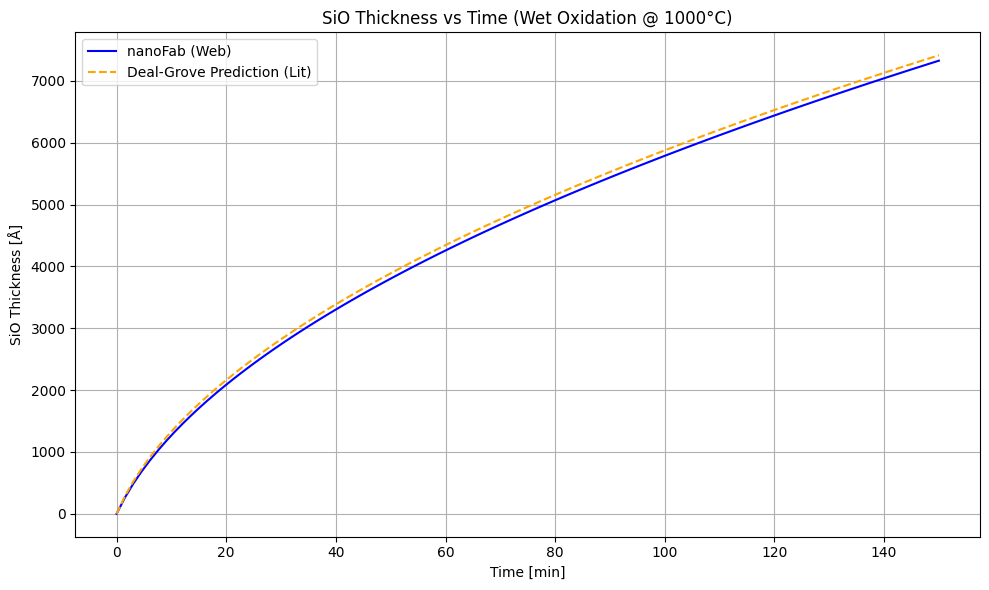

87.5878037532375
7415.577803753237
7327.99


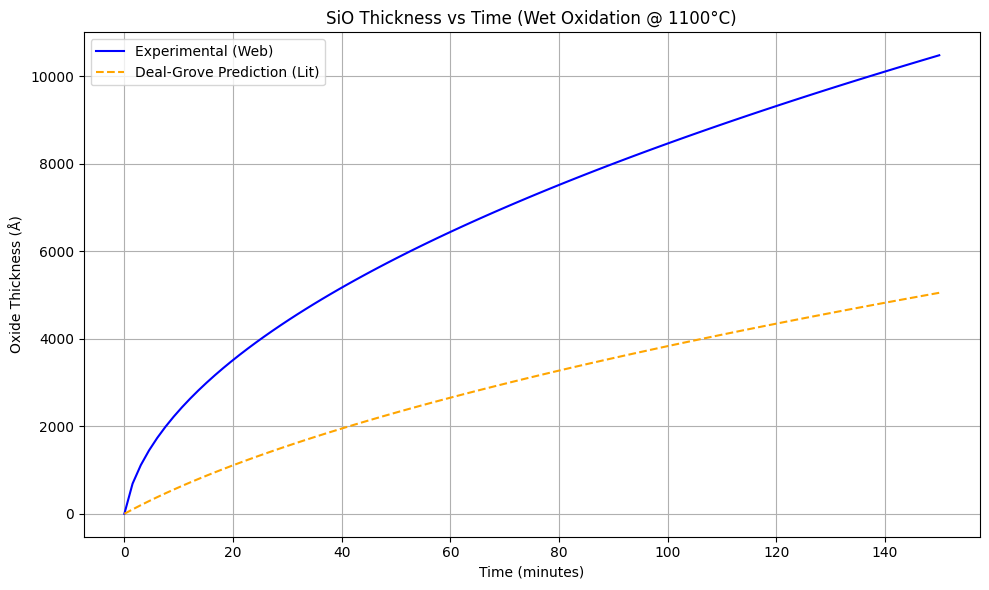

In [633]:
# READ IN DATA

web1 = np.array([
[0, 0],
[1.51515, 261.911],
[3.0303, 484.962],
[4.54545, 682.581],
[6.06061, 861.882],
[7.57576, 1027.17],
[9.09091, 1181.31],
[10.6061, 1326.27],
[12.1212, 1463.53],
[13.6364, 1594.2],
[15.1515, 1719.15],
[16.6667, 1839.06],
[18.1818, 1954.51],
[19.697, 2065.95],
[21.2121, 2173.78],
[22.7273, 2278.33],
[24.2424, 2379.87],
[25.7576, 2478.66],
[27.2727, 2574.9],
[28.7879, 2668.79],
[30.303, 2760.48],
[31.8182, 2850.14],
[33.3333, 2937.87],
[34.8485, 3023.81],
[36.3636, 3108.07],
[37.8788, 3190.72],
[39.3939, 3271.87],
[40.9091, 3351.59],
[42.4242, 3429.96],
[43.9394, 3507.04],
[45.4545, 3582.9],
[46.9697, 3657.58],
[48.4848, 3731.15],
[50, 3803.64],
[51.5152, 3875.12],
[53.0303, 3945.61],
[54.5455, 4015.16],
[56.0606, 4083.81],
[57.5758, 4151.59],
[59.0909, 4218.53],
[60.6061, 4284.66],
[62.1212, 4350.01],
[63.6364, 4414.6],
[65.1515, 4478.48],
[66.6667, 4541.64],
[68.1818, 4604.13],
[69.697, 4665.96],
[71.2121, 4727.15],
[72.7273, 4787.72],
[74.2424, 4847.69],
[75.7576, 4907.08],
[77.2727, 4965.9],
[78.7879, 5024.18],
[80.303, 5081.91],
[81.8182, 5139.13],
[83.3333, 5195.84],
[84.8485, 5252.05],
[86.3636, 5307.78],
[87.8788, 5363.05],
[89.3939, 5417.85],
[90.9091, 5472.22],
[92.4242, 5526.14],
[93.9394, 5579.64],
[95.4545, 5632.73],
[96.9697, 5685.41],
[98.4848, 5737.69],
[100, 5789.59],
[101.515, 5841.1],
[103.03, 5892.25],
[104.545, 5943.03],
[106.061, 5993.46],
[107.576, 6043.53],
[109.091, 6093.27],
[110.606, 6142.67],
[112.121, 6191.75],
[113.636, 6240.51],
[115.152, 6288.95],
[116.667, 6337.08],
[118.182, 6384.9],
[119.697, 6432.44],
[121.212, 6479.67],
[122.727, 6526.63],
[124.242, 6573.3],
[125.758, 6619.69],
[127.273, 6665.82],
[128.788, 6711.67],
[130.303, 6757.27],
[131.818, 6802.6],
[133.333, 6847.69],
[134.848, 6892.52],
[136.364, 6937.11],
[137.879, 6981.45],
[139.394, 7025.56],
[140.909, 7069.44],
[142.424, 7113.09],
[143.939, 7156.51],
[145.455, 7199.7],
[146.97, 7242.68],
[148.485, 7285.44],
[150, 7327.99]])

# Constants from literature at 1000°C (wet oxidation)
A = 0.226  # microns
B = 0.287  # microns^2/hr

# Time in hours matching web[:, 0] (which is in minutes)
time_min = web1[:, 0]
time_hr = time_min / 60

# Deal-Grove model prediction
x0 = lambda a, b, t: (-a + np.sqrt(a**2 + 4 * b * t)) / 2
x = x0(A, B, time_hr)  # x in microns
x_angstrom = x * 1e4  # convert to angstroms

plt.figure(figsize=(10, 6))
plt.plot(web1[:, 0], web1[:, 1], label='nanoFab (Web)', color='blue')
plt.plot(time_min, x_angstrom, label='Deal-Grove Prediction (Lit)', color='orange', linestyle='--')
plt.title('SiO Thickness vs Time (Wet Oxidation @ 1000°C)')
plt.xlabel('Time [min]')
plt.ylabel('SiO Thickness [Å]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('web_lit1000.png', dpi=800)
plt.show()

print(x_angstrom[-1] - web1[-1, 1])
print(x_angstrom[-1])
print(web1[-1, 1])
res = web1[:, 1] - x_angstrom

web11 = np.array([
[0, 0],
[1.51515, 689.474],
[3.0303, 1113.19],
[4.54545, 1448.71],
[6.06061, 1735.34],
[7.57576, 1989.73],
[9.09091, 2220.8],
[10.6061, 2433.99],
[12.1212, 2632.9],
[13.6364, 2820.06],
[15.1515, 2997.34],
[16.6667, 3166.16],
[18.1818, 3327.62],
[19.697, 3482.61],
[21.2121, 3631.85],
[22.7273, 3775.93],
[24.2424, 3915.36],
[25.7576, 4050.56],
[27.2727, 4181.89],
[28.7879, 4309.67],
[30.303, 4434.17],
[31.8182, 4555.63],
[33.3333, 4674.27],
[34.8485, 4790.26],
[36.3636, 4903.79],
[37.8788, 5014.99],
[39.3939, 5124.02],
[40.9091, 5230.98],
[42.4242, 5336],
[43.9394, 5439.18],
[45.4545, 5540.61],
[46.9697, 5640.37],
[48.4848, 5738.55],
[50, 5835.22],
[51.5152, 5930.44],
[53.0303, 6024.29],
[54.5455, 6116.81],
[56.0606, 6208.06],
[57.5758, 6298.1],
[59.0909, 6386.97],
[60.6061, 6474.71],
[62.1212, 6561.37],
[63.6364, 6646.98],
[65.1515, 6731.59],
[66.6667, 6815.22],
[68.1818, 6897.91],
[69.697, 6979.7],
[71.2121, 7060.6],
[72.7273, 7140.65],
[74.2424, 7219.88],
[75.7576, 7298.31],
[77.2727, 7375.96],
[78.7879, 7452.85],
[80.303, 7529.02],
[81.8182, 7604.47],
[83.3333, 7679.23],
[84.8485, 7753.31],
[86.3636, 7826.74],
[87.8788, 7899.53],
[89.3939, 7971.7],
[90.9091, 8043.27],
[92.4242, 8114.24],
[93.9394, 8184.63],
[95.4545, 8254.46],
[96.9697, 8323.74],
[98.4848, 8392.48],
[100, 8460.7],
[101.515, 8528.41],
[103.03, 8595.61],
[104.545, 8662.32],
[106.061, 8728.56],
[107.576, 8794.32],
[109.091, 8859.62],
[110.606, 8924.48],
[112.121, 8988.89],
[113.636, 9052.87],
[115.152, 9116.42],
[116.667, 9179.56],
[118.182, 9242.29],
[119.697, 9304.63],
[121.212, 9366.57],
[122.727, 9428.12],
[124.242, 9489.3],
[125.758, 9550.11],
[127.273, 9610.55],
[128.788, 9670.64],
[130.303, 9730.37],
[131.818, 9789.76],
[133.333, 9848.81],
[134.848, 9907.53],
[136.364, 9965.91],
[137.879, 10024],
[139.394, 10081.7],
[140.909, 10139.2],
[142.424, 10196.3],
[143.939, 10253.1],
[145.455, 10309.6],
[146.97, 10365.9],
[148.485, 10421.8],
[150, 10477.5]])

A = 0.5#0.11
B = 0.203#0.51

x = x0(A, B, time_hr)  # x in microns
x_angstrom = x * 1e4  # convert to angstroms

plt.figure(figsize=(10, 6))
plt.plot(web11[:, 0], web11[:, 1], label='Experimental (Web)', color='blue')
plt.plot(time_min, x_angstrom, label='Deal-Grove Prediction (Lit)', color='orange', linestyle='--')
plt.title('SiO Thickness vs Time (Wet Oxidation @ 1100°C)')
plt.xlabel('Time (minutes)')
plt.ylabel('Oxide Thickness (Å)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

# plt.figure(figsize=(10, 6))
# plt.plot(web[:, 0], res, label='Residuals', color='red')
# plt.axhline(0, color='black', linestyle='--')
# plt.title('Residuals of Experimental vs Model')
# plt.xlabel('Time (minutes)')
# plt.ylabel('Residuals (Å)')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


In [610]:
'''
LOAD THE INITIAL AND FINAL DATA
WE NEED TO DO THIS TO CALCULATE THE VAPOR PRESSURE
ONCE WE HAVE THE VAPOR PRESSURE WE CAN GENERATE OUR THEORETICAL DATA OJO
'''

data_files = os.listdir('data/main_data')
work_dir = os.getcwd()

for file in data_files:
        if file.endswith('final.csv'):
            df_final = pd.read_csv(os.path.join('data/main_data', file))
        elif file.endswith('initial.csv'):
            df_init = pd.read_csv(os.path.join('data/main_data', file))

print(data_files)

cols = df_init.columns
col_num = len(cols)

chip_num = int(cols[-1][-1])
run_num = (len(cols) - 1) // 5

avg_row = len(df_final[cols[0]]) - 4
time_row = len(df_final[cols[0]]) - 3
water_temp_row = len(df_final[cols[0]]) - 2
furnace_temp_row = len(df_final[cols[0]]) - 1

# Estimate ellipsometer error
sample_chip = 112 # \AA
data_ref = np.array([99.89, 100.23, 99.52, 100.03, 99.54, 99.61]) # \AA
data_ref_mean = np.mean(data_ref)
ell_err = sample_chip - data_ref_mean   # We ignore the variance of the data_ref since it's so small compared to the systematic error
print(ell_err)


init_thickness = np.empty((col_num - 1,), dtype=object)
final_thickness = np.empty((col_num - 1,), dtype=object)
for i in range(1, col_num):
    init_vals = df_init[cols[i]].iloc[:(avg_row)].values
    err = np.ones_like(init_vals) * ell_err
    init = unp.uarray(init_vals, err)
    init_thickness[i-1] = np.mean(init)
    
    fin_vals = df_final[cols[i]].iloc[:(avg_row)].values
    fin = unp.uarray(fin_vals, err)
    final_thickness[i-1] = np.mean(fin)

# init_thickness = df_init[cols[1:]].iloc[avg_row].values
# final_thickness = df_final[cols[1:]].iloc[avg_row].values
time = df_final[cols[1:]].iloc[time_row].values
water_temp = df_final[cols[1:]].iloc[water_temp_row].values
furnace_temp = (df_final[cols[1:]].iloc[furnace_temp_row].values)[::chip_num]

print(init_thickness)
print("-----------------------------------------------------------")
print(final_thickness)
# print(time)
# print(water_temp)
# print(furnace_temp)

# get ascii
# print(type(chip_num))
# print((chip_num))
# print(run_num)




['ox_data_initial.csv', 'ox_data_final.csv']
12.196666666666673
[50.018+/-5.45451515311449 22.933999999999997+/-5.45451515311449
 18.032+/-5.45451515311449 16.26+/-5.45451515311449
 27.803999999999995+/-5.45451515311449 20.344+/-5.45451515311449
 15.776+/-5.45451515311449 21.372+/-5.45451515311449
 19.276+/-5.45451515311449 21.762+/-5.45451515311449
 23.436+/-5.45451515311449 22.57+/-5.45451515311449
 25.026+/-5.45451515311449 17.630000000000003+/-5.45451515311449
 21.086+/-5.45451515311449]
-----------------------------------------------------------
[950.6120000000001+/-5.45451515311449 1692.014+/-5.45451515311449
 2594.228+/-5.45451515311449 3000.7419999999997+/-5.45451515311449
 3594.4479999999994+/-5.45451515311449 2368.782+/-5.45451515311449
 3826.9660000000003+/-5.45451515311449 5262.378+/-5.45451515311449
 5918.132+/-5.45451515311449 6873.244000000001+/-5.45451515311449
 3580.504+/-5.45451515311449 4642.764+/-5.45451515311449
 5605.146+/-5.45451515311449 6674.9+/-5.4545151531144

In [611]:

'''
OJO the error for the water temp is +/- 1C

For the water temp we have variable temp with time which complicates things
as such since we cant really account for this kind of variation we are going to
take the avg water temp for the chip set run
Also since the error is so large it doesn't really affect things all that much
'''

# ===========================================================

# Antoine Equation to estimate vapor pressure
def antoine_eq(T):
    # Antoine constants for water below 100C
    A = 8.07131
    B = 1730.63
    C = 233.426

    # Calculate vapor pressure in mmHg
    P = 10 ** (A - (B / (T + C)))  # T in Celsius, P in mmHg

    return P/760  # Convert to atm

water_temp_uncert = unp.uarray(water_temp, np.ones_like(water_temp))  # Adding uncertainty of +/- 1C

water_temp_chips_avg = np.array([
    np.mean(water_temp_uncert[i:(i + chip_num)]) 
    for i in range(0, len(water_temp_uncert), chip_num)
])

approx_vapor_pressure = antoine_eq(water_temp_chips_avg)

init_thickness_avg = np.array([
    np.mean(init_thickness[i:(i + chip_num)]) 
    for i in range(0, len(init_thickness), chip_num)
])

print("water_temp_chips_avg:")
print(water_temp_chips_avg)
print("approx_vapor_pressure:")
print(approx_vapor_pressure)
# print("init_thickness:")
# for i in range(0, chip_num * run_num, chip_num): print(init_thickness[i:(i + chip_num)])
# print("furnace_temp:")
# print(furnace_temp)

# print(water_temp[chip_num*2:4*chip_num])


water_temp_chips_avg:
[95.2+/-0.447213595499958 96.2+/-0.447213595499958
 96.64+/-0.447213595499958]
approx_vapor_pressure:
[0.8399168273270836+/-0.013860131644471535
 0.8713903635885363+/-0.014292386320329736
 0.8855472349051021+/-0.014485886079927103]


In [612]:
'''
NOW WE LOAD THE THEORY DATA GENERATED USING
https://toolbox.nanofab.ualberta.ca/sithox/index.php#calculator

As of writing this there is no way to download a csv file from the website
but you can right-click and "view page source" and copy the data from there

The data is in the following format:
data.addRows([
[0, 0],
[1.66667, 732.476],
[3.33333, 1177.08],
[5, 1528.33],
[6.66667, 1828.11],
[8.33333, 2094.02],
...
[160, 10776.5],
[161.667, 10835.2],
[163.333, 10893.5],
[165, 10951.6],
]);

You can then copy the data and paste it into a csv file

Also it is uncertain what kind of Si orientation we are using so we will assume 100

'''

# df_theory = np.zeros(3, dtype=object)
# file name format: theory_xxx_a2.csv
theory_100_dir = os.listdir('data/theory_100')
df_theory_100 = {}
df_theory_111 = {}
df_theory_110 = {}
for file in theory_100_dir: 
    if ((file.startswith('theory'))):# and (file.endswith('.csv'))):
        file_dir = os.path.join('data/theory_100', file)
        file_parts = file.split('_')
        key = file_parts[-1][:-4]
        
        df = pd.read_csv(file_dir)
        
        if file_parts[1] == '100':
            df_theory_100[key] = df
        elif file_parts[1] == '111':
            df_theory_111[key] = df
        elif file_parts[1] == '110':
            df_theory_110[key] = df


# test = "theory_100_a2.csv"
# test_split = test.split('_')
# print(test_split)
# test_key = test_split[-1][:-4]
# print(test_key)


In [613]:
# Fit curve to the averaged theoretical data
def deal_grove_fit(t, A, B, tau):
    return (-A + np.sqrt((A * A) + (4 * B * (t + tau)))) / 2

deal_grove_uncert = lambda t, A, B, tau: (-A + unp.sqrt((A * A) + (4 * B * (t + tau)))) / 2

# A: um, B: um^2/hr, tau: hr ----> A: angstroms, B: angstroms^2/min, tau: min
initial_guesses = np.array([[0.5, 0.203, 0],            # A, B, tau | 920C from Lit for 900C guess
                            [0.226, 0.287, 0],          # A, B, tau | 1000C from Lit for 1000C guess
                            [0.11, 0.51, 0]])           # A, B, tau | 1100C from Lit for 1100C guess
initial_guesses *= np.array([1e4, 1e8 / 60, 1 / 60])    # Unit conversion to angstroms, angstroms^2/min, min

def sci_notation(nom, err, precision=2):
    exponent = int(np.floor(np.log10(abs(nom)))) if nom != 0 else 0
    base = nom / (10**exponent)
    base_err = err / (10**exponent)
    return f"({base:.{precision}f} ± {base_err:.{precision}f})" + r"$\cdot$" + f"10$^{{{exponent}}}$"

colors = ['C0', 'C1', 'C2', 'C3', 'C4']

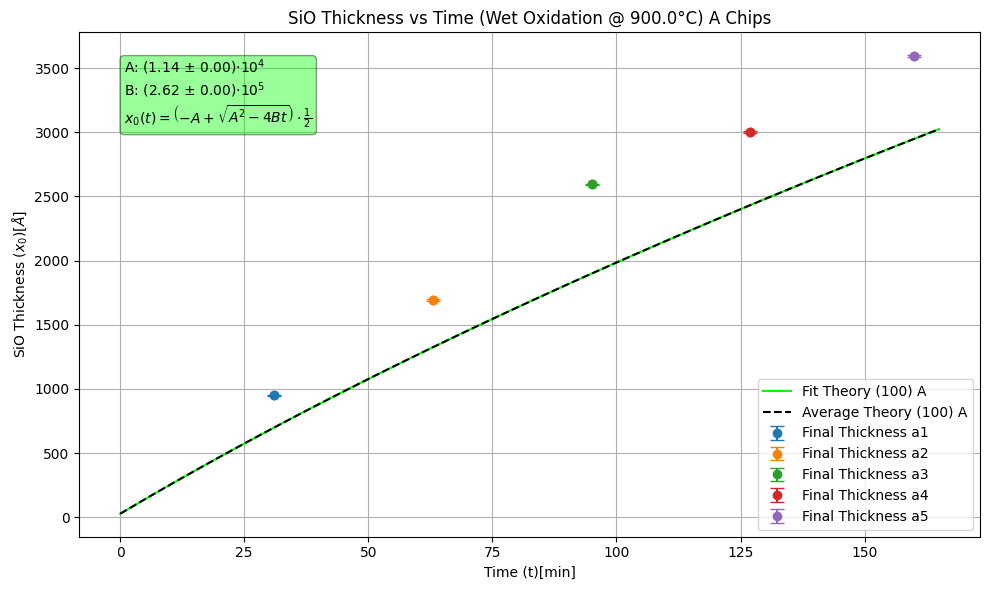

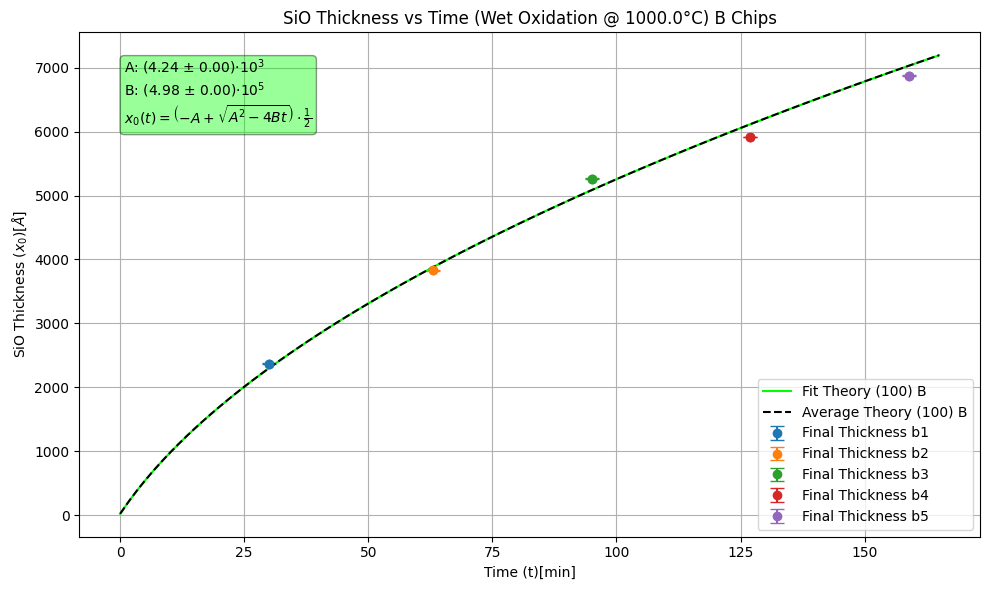

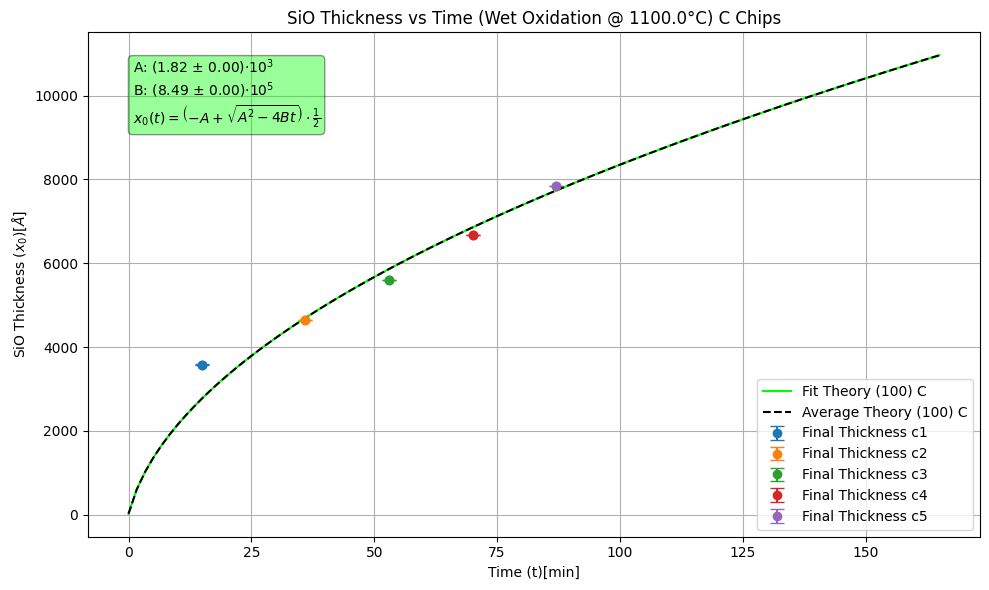

In [636]:
'''
Ok so the theoretical data is pretty close at this scale since here it is mostly affected by the initial thickness of the chip
Thus to help with accuracy and to have a curve that represents all data points equally even though they have different initial thicknesses
we are going to take the average of the theoretical data curves for each chip set run.
Then we will fit a curve to the averaged theoretical data and we will use that to calculate the deviation from the experimental data
'''

def avg_theory_data(df_theory):
    # Average the theoretical data for each chip set run
    keys = list(df_theory.keys())
    theory_size = len(df_theory['a2'])
    avg_theory = {}
    for i in range(0, chip_num * run_num, chip_num):
        run_id = keys[i][0]
        # print(run_id)
        avg_theory[run_id] = np.zeros((theory_size, 2))
        
        for j in range(chip_num):
            df = df_theory[keys[i + j]]
            avg_theory[run_id] += df.values
        
        avg_theory[run_id] /= (chip_num)
    
    return avg_theory

def fit_data(df_theory):
    avg_fit = {}
    # Fit the theoretical data to the experimental data
    for key in df_theory.keys():
        time = df_theory[key][:, 0] 
        ox = df_theory[key][:, 1]
        
        p0 = initial_guesses[ord(key) - 97]
        popt, pcov = curve_fit(deal_grove_fit, time, ox, p0=p0)
        err = np.sqrt(np.diag(pcov))

        avg_fit[key] = unp.uarray(popt, err)

    return avg_fit

def plot_data(df_theory, avg_fit):
    # Plot the theoretical data
    keys = list(df_theory.keys())
    
    final_nom = unp.nominal_values(final_thickness)
    final_err = unp.std_devs(final_thickness)
    
    for i in range(chip_num * run_num):
        if i % chip_num == 0:
            plt.figure(figsize=(10, 6))
            run_id = keys[i][0].lower()
            plt.title(f'SiO Thickness vs Time (Wet Oxidation @ {furnace_temp[ord(run_id) - 97]}°C) {run_id.upper()} Chips')
        
        df = df_theory[keys[i]]
        # plt.plot(df.iloc[:, 0], df.iloc[:, 1], color=colors[i % chip_num], label=f'Theory (100) {keys[i]}')
        
        plt.scatter(time[i], final_nom[i], color=colors[i % chip_num])
        plt.errorbar(time[i], final_nom[i], yerr=final_err[i], fmt='o', color=colors[i % chip_num], capsize=5, label=f'Final Thickness {keys[i]}')

        # plt.scatter(time[i], unp.nominal_values(deal_grove_uncert(time[i], *avg_fit[run_id])), color='c', label=f'Fit Theory {keys[i]}')
        
        if ((i + 1) % chip_num == 0):
            plt.plot(avg_100[run_id][:, 0], unp.nominal_values(deal_grove_uncert(avg_100[run_id][:, 0], *avg_fit[run_id])), color='lime', linestyle='-', label=f'Fit Theory (100) {run_id.upper()}')
            plt.plot(avg_100[run_id][:, 0], avg_100[run_id][:, 1], color='k', linestyle='--', label=f'Average Theory (100) {run_id.upper()}')
            
            # Extract fitted parameters A and B
            A = avg_fit[run_id][0]
            B = avg_fit[run_id][1]
            A_nom, A_err = A.nominal_value, A.std_dev
            B_nom, B_err = B.nominal_value, B.std_dev

            # Format in scientific notation
            # A_str = f"A = ({A_nom:.2e} ± {A_err:.1e})"
            A_str = "A: " + sci_notation(A_nom, A_err)
            # B_str = f"B = ({B_nom:.2e} ± {B_err:.1e})"
            B_str = "B: " + sci_notation(B_nom, B_err)
            
            quad = r"$x_0(t) = \left(-A + \sqrt{A^2 - 4Bt}\right) \cdot \frac{1}{2}$"
            
            # Add fit equation text to the plot
            plt.text(0.05, 0.95, f"{A_str}\n{B_str}\n{quad}", transform=plt.gca().transAxes,
                     fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='lime', alpha=0.4))

            
            plt.xlabel('Time (t)[min]')
            plt.ylabel(r'SiO Thickness $(x_0)[\AA$]')
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.savefig(f'fit_{run_id}.png', dpi=800)
            plt.show()

avg_100 = avg_theory_data(df_theory_100)
    
avg_100_fit = fit_data(avg_100)

plot_data(df_theory_100, avg_100_fit)



----------------------------------------------------------------
RMSE for a: 533.364
NRMSE for a: 0.225
----------------------------------------------------------------


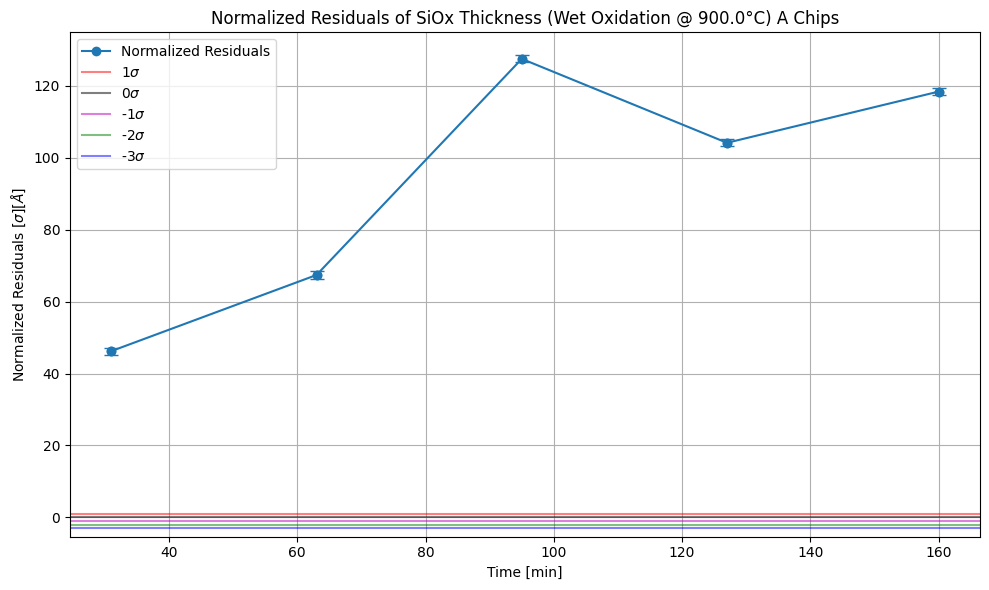

----------------------------------------------------------------
----------------------------------------------------------------
RMSE for b: 144.298
NRMSE for b: 0.030
----------------------------------------------------------------


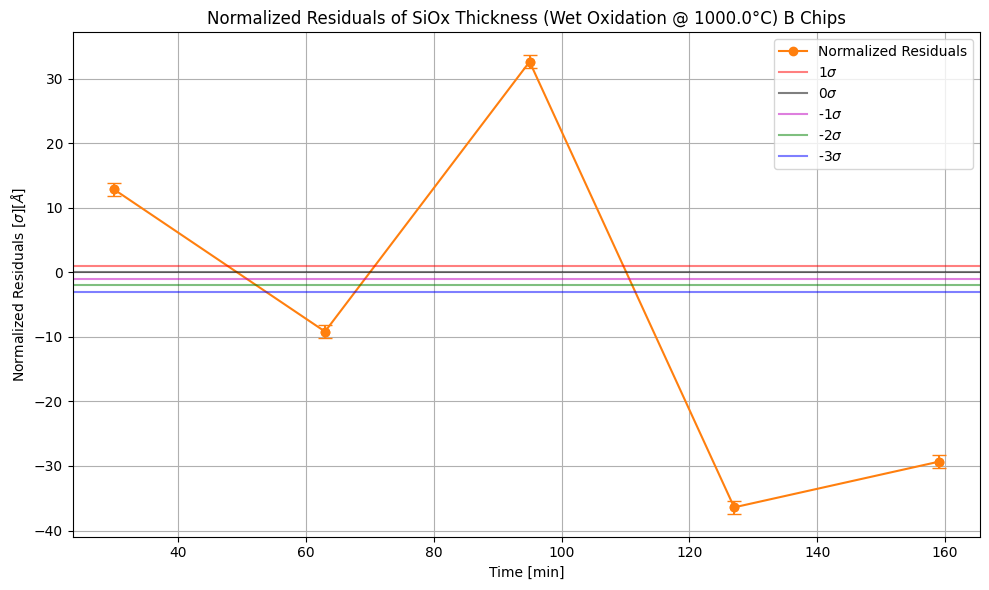

----------------------------------------------------------------
----------------------------------------------------------------
RMSE for c: 389.669
NRMSE for c: 0.069
----------------------------------------------------------------


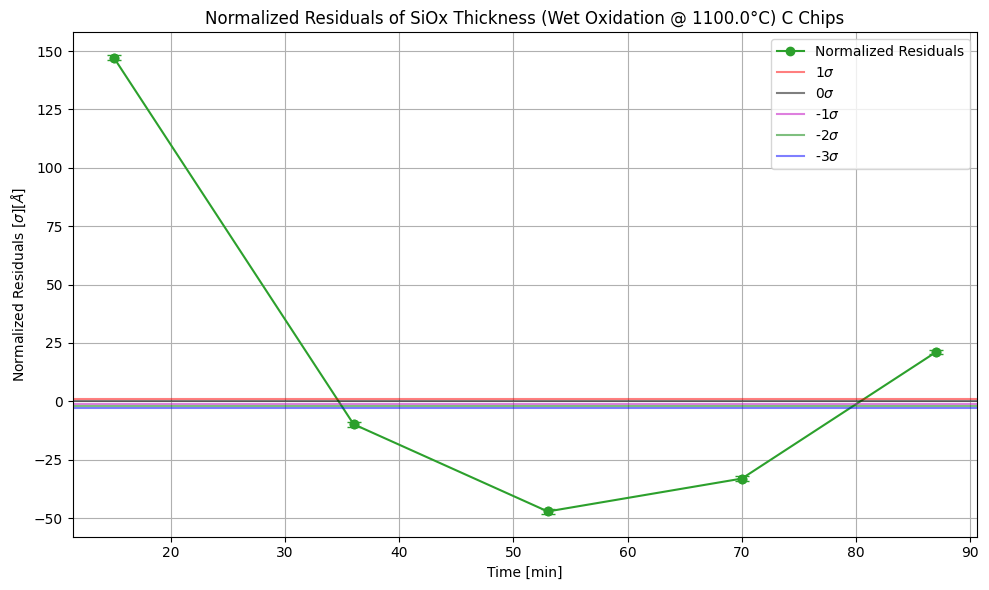

----------------------------------------------------------------


In [637]:
# STATISTICAL CORRELATION ANALYSIS

'''
The data left to analyse isn't too difficult; the issue is that we literally have no uncertainty to look at.
The data that was provided was deprived of any error (not good ):) the only error I could piece together was from the water temp
but that's used to calculate the vapor pressure for the theoretical data and not the oxide thickness so there's no real good
way to propagate that. We also technically have covariant fitting error for the theoretical data but that doesn't really help us
since the fit was actually really good so the error is essentially negligible.
Ideally, it would have been nice to have the error from the ellipsometer but that data was not provided. Also could have been nice
to have the time measurement error but that was not provided either and I can't imagine that measuring the error in a minute is 
particularly useful compared to the other sources of uncertainty.
We shouldn't use the variance (standard deviation) of the data since our sample size is too small to be considered a good representation,
for that we would need at least 30 samples to be considered a good representation of the population. (we have 5 samples for each run...)
This kinda leaves un in a weird spot where we can't really use many statistical methods to analyse the data since error and uncertainty
is kinda important for that. So realistically we are gonna have to stick to residuals.
Ok so we technically have the error from the ellipsometer but that data was not provided.
'''

def normalized_residuals(dtime, data, theory):
    
    data_time = dtime
    
    thick_nom = unp.nominal_values(data)
    thick_err = unp.std_devs(data)
    
    theory = deal_grove_uncert(data_time, *theory)
    theory_nom = unp.nominal_values(theory)
    theory_err = unp.std_devs(theory)
    
    total_err = np.sqrt(thick_err**2 + theory_err**2)
    
    # Calculate the residuals
    norm_res = (thick_nom - theory_nom)
    
    norm_res_err = unp.std_devs(data - theory)/total_err
    
    rmse = np.sqrt(np.mean(norm_res**2))
    
    nrmse = rmse / np.mean(thick_nom)
    
    norm_res /= total_err
    
    return unp.uarray(norm_res, norm_res_err), rmse, nrmse

for key in avg_100.keys():
    
    start_idx = (ord(key) - 97) * chip_num
    data_time = time[start_idx:start_idx + chip_num]
    data_thickness = final_thickness[start_idx:start_idx + chip_num]
    
    norm_res, rmse, nrmse = normalized_residuals(data_time, data_thickness, avg_100_fit[key])
    
    norm_res_nom = unp.nominal_values(norm_res)
    norm_res_err = unp.std_devs(norm_res)
    
    print("----------------------------------------------------------------")
    print(f"RMSE for {key}: {rmse:.3f}")
    print(f"NRMSE for {key}: {nrmse:.3f}")
    print("----------------------------------------------------------------")
    
    plt.figure(figsize=(10, 6))
    plt.plot(data_time, norm_res_nom, label='Normalized Residuals', color=colors[start_idx//chip_num], marker='o')
    plt.errorbar(data_time, norm_res_nom, yerr=norm_res_err, fmt='o', color=colors[start_idx//chip_num], capsize=5)
    
    plt.axhline(1, color='r', linestyle='-', alpha=0.5, label=r'1$\sigma$')
    plt.axhline(0, color='k', linestyle='-', alpha=0.5, label=r'0$\sigma$')
    plt.axhline(-1, color='m', linestyle='-', alpha=0.5, label=r'-1$\sigma$')
    plt.axhline(-2, color='g', linestyle='-', alpha=0.5, label=r'-2$\sigma$')
    plt.axhline(-3, color='b', linestyle='-', alpha=0.5, label=r'-3$\sigma$')
    # plt.xlim(0, 1.0)
    plt.xlabel('Time [min]')
    plt.ylabel(r'Normalized Residuals [$\sigma$][$\AA$]')
    plt.title(f'Normalized Residuals of SiOx Thickness (Wet Oxidation @ {furnace_temp[ord(key) - 97]}°C) {key.upper()} Chips')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'norm_res_{key}.png', dpi=800)
    plt.show()
    
    print("----------------------------------------------------------------")





In [ ]:
theory_str = r"""
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="description" content="Calculator for thermal oxidation of silicon">
    <meta name="author" content="Aaron Hryciw">
    <link rel="icon" href="/favicon.ico">

    <title>nanoFAB - sithox</title>

    <!-- Bootstrap core CSS:  4.5.3 -->
    <link href="../common/bootstrap.min.css" rel="stylesheet">

    <!-- Custom styles for this page -->
     <link href="./sithox.css" rel="stylesheet">


     <script>

       function hasClass(el, className) {
         if (el.classList)
           return el.classList.contains(className)
         else
           return !!el.className.match(new RegExp('(\\s|^)' + className + '(\\s|$)'))
        }

        function addClass(el, className) {
         if (el.classList)
           el.classList.add(className)
         else if (!hasClass(el, className)) el.className += " " + className
        }

        function removeClass(el, className) {
         if (el.classList)
           el.classList.remove(className)
         else if (hasClass(el, className)) {
           var reg = new RegExp('(\\s|^)' + className + '(\\s|$)')
           el.className=el.className.replace(reg, ' ')
         }
        }

       function chooseWet(sp) {
         addClass(document.getElementById("wetbtn"), "active");
         removeClass(document.getElementById("drybtn"), "active");
         document.oxform.wet.checked=true;
         document.oxform.dry.checked=false;
         addClass(document.getElementById("Mbtn"), "disabled");
         removeClass(document.getElementById("Mbtn"), "active");
         document.oxform.massoud.disabled=true;
         addClass(document.getElementById("DGbtn"), "active");
         document.oxform.dealgrove.checked=true;
         document.oxform.pp.disabled=false;
         if (sp) document.oxform.pp.value="0.92";
       }

       function chooseDry(sp) {
         addClass(document.getElementById("drybtn"), "active");
         removeClass(document.getElementById("wetbtn"), "active");
         document.oxform.dry.checked=true;
         document.oxform.wet.checked=false;
         removeClass(document.getElementById("Mbtn"), "disabled");
         document.oxform.massoud.disabled=false;
         if (sp) document.oxform.pp.value="1.00";
         document.getElementById("ModelHelpBlock").innerHTML = "";
         var el = document.getElementById("Mbtn");
         if (hasClass(el, "active")) {
           document.oxform.pp.disabled=true;
           document.oxform.pp.value="1.00";
         }
       }

       function chooseDG() {
         document.oxform.pp.disabled=false;
       }

       function xGiven() {
         document.oxform.x.disabled=false;
         document.oxform.t_h.value="";
         document.oxform.t_m.value="";
         document.oxform.t_s.value="";
         document.oxform.t_h.disabled=true;
         document.oxform.t_m.disabled=true;
         document.oxform.t_s.disabled=true;
         document.getElementById("t_invalid").innerHTML="";
         removeClass(document.getElementById("t_h"), "is-invalid");
         removeClass(document.getElementById("t_m"), "is-invalid");
         removeClass(document.getElementById("t_s"), "is-invalid");
       }

       function tGiven() {
         document.oxform.t_h.disabled=false;
         document.oxform.t_m.disabled=false;
         document.oxform.t_s.disabled=false;
         document.oxform.x.value="";
         document.oxform.x.disabled=true;
         document.getElementById("x_invalid").innerHTML="";
         removeClass(document.getElementById("x"), "is-invalid");
       }

     </script>

     <!-- Google Charts -->
     <script type="text/javascript" src="../common/loader.js"></script>
     <script type="text/javascript">

     google.charts.load('current', {'packages':['corechart']});

     google.charts.setOnLoadCallback(drawChart);

     function drawChart() {

       var data = new google.visualization.DataTable();
       data.addColumn('number', 'Oxidation time (min)');
       data.addColumn('number', ''); // Oxide thickness (Å)

       data.addRows([
         [0, 21.086],
[1.66667, 600.117],
[3.33333, 1012.13],
[5, 1350.3],
[6.66667, 1644.11],
[8.33333, 1907.47],
[10, 2148.24],
[11.6667, 2371.4],
[13.3333, 2580.33],
[15, 2777.45],
[16.6667, 2964.56],
[18.3333, 3143.04],
[20, 3313.99],
[21.6667, 3478.29],
[23.3333, 3636.66],
[25, 3789.69],
[26.6667, 3937.9],
[28.3333, 4081.71],
[30, 4221.5],
[31.6667, 4357.57],
[33.3333, 4490.23],
[35, 4619.7],
[36.6667, 4746.21],
[38.3333, 4869.95],
[40, 4991.09],
[41.6667, 5109.81],
[43.3333, 5226.22],
[45, 5340.47],
[46.6667, 5452.67],
[48.3333, 5562.92],
[50, 5671.33],
[51.6667, 5777.98],
[53.3333, 5882.96],
[55, 5986.34],
[56.6667, 6088.19],
[58.3333, 6188.58],
[60, 6287.57],
[61.6667, 6385.22],
[63.3333, 6481.58],
[65, 6576.7],
[66.6667, 6670.63],
[68.3333, 6763.41],
[70, 6855.08],
[71.6667, 6945.68],
[73.3333, 7035.24],
[75, 7123.81],
[76.6667, 7211.42],
[78.3333, 7298.08],
[80, 7383.85],
[81.6667, 7468.73],
[83.3333, 7552.77],
[85, 7635.98],
[86.6667, 7718.38],
[88.3333, 7800.01],
[90, 7880.88],
[91.6667, 7961.01],
[93.3333, 8040.42],
[95, 8119.14],
[96.6667, 8197.18],
[98.3333, 8274.55],
[100, 8351.27],
[101.667, 8427.37],
[103.333, 8502.85],
[105, 8577.73],
[106.667, 8652.03],
[108.333, 8725.75],
[110, 8798.91],
[111.667, 8871.53],
[113.333, 8943.61],
[115, 9015.17],
[116.667, 9086.21],
[118.333, 9156.75],
[120, 9226.81],
[121.667, 9296.38],
[123.333, 9365.48],
[125, 9434.12],
[126.667, 9502.31],
[128.333, 9570.05],
[130, 9637.36],
[131.667, 9704.24],
[133.333, 9770.7],
[135, 9836.75],
[136.667, 9902.4],
[138.333, 9967.65],
[140, 10032.5],
[141.667, 10097],
[143.333, 10161.1],
[145, 10224.8],
[146.667, 10288.2],
[148.333, 10351.2],
[150, 10413.9],
[151.667, 10476.2],
[153.333, 10538.2],
[155, 10599.9],
[156.667, 10661.2],
[158.333, 10722.2],
[160, 10782.9],
[161.667, 10843.2],
[163.333, 10903.3],
[165, 10963],
       ]);

       var formatter_x = new google.visualization.NumberFormat({suffix: ' Å'});
       formatter_x.format(data, 1);  //

       var formatter_t = new google.visualization.NumberFormat({suffix: ' min'});
       formatter_t.format(data, 0);  // Adds "min" to tooltip

           var options = {
             titleTextStyle:  {fontSize: 18,  bold: true,  italic: false },
             fontName:  'Calibri',
             // width: 900,
             // height: 500,
             colors: ['#E8D000'],
             // Gives each series an axis that matches the vAxes number below
             series: {
               0: {targetAxisIndex: 0},
             },
             vAxes: {
               // Adds titles to each axis
               0: {title: 'Oxide thickness (Å)',titleTextStyle:  {fontSize: 16,  bold: true,  italic: false }},
             },
             hAxis: {
               title: 'Oxidation time (min)',
               titleTextStyle:  {fontSize: 16,  bold: true,  italic: false }
             },
             // chartArea:{top:25,bottom:80,width:"80%",height:"80%"},
             chartArea:{top:25,bottom:80},
             legend: {position: 'none'}
           };

             var chart = new google.visualization.LineChart(document.getElementById('chart_div'));
             chart.draw(data, options);
         }

     </script>

  </head>

  <body onload='chooseWet(0);'>

    <nav class="navbar navbar-expand-md navbar-light fixed-top bg-light">
      <div class="container">
      <a class="navbar-brand" href="https://www.nanofab.ualberta.ca"><img src="../common/nFwafers.svg" width="30"></a>
      <button class="navbar-toggler" type="button" data-toggle="collapse" data-target="#navbarsExampleDefault" aria-controls="navbarsExampleDefault" aria-expanded="false" aria-label="Toggle navigation">
        <span class="navbar-toggler-icon"></span>
      </button>

      <div class="collapse navbar-collapse" id="navbarsExampleDefault">
        <ul class="navbar-nav mr-auto">
          <li class="nav-item">
              <a class="nav-link" href="#calculator">Calculator</a>
          </li>
          <li class="nav-item">
              <a class="nav-link" href="#instructions">Instructions</a>
          </li>
          <li class="nav-item">
              <a class="nav-link" href="#references">References</a>
          </li>
        </ul>

      </div>
    </div>
    </nav>

    <main role="main">

      <div class="jumbotron">
        <div class="container">
          <h1 class="display-3">Silicon thermal oxidation calculator</h1>
          <p class="lead">
            Calculate silicon oxide thickness or oxidation time.
          </p>
          <p>This calculator uses the Deal–Grove or Massoud models for thermal oxidation of silicon.  Choose the oxidation process parameters (wet/dry, oxidation temperature, Si crystal orientation, etc.), and the calculator will return either the oxide thickness given oxidation time or the oxidation time given thickness, with a plot of results.</p>
        </div>
      </div>

      <section id="calculator" class="container">

        <h2>Calculator</h2>
        <p>Use this form to calculate either oxidation time given final oxide thickness, or thickness given time.</p>

        <form name="oxform" method="post" action="/sithox/index.php#calculator" enctype="multipart/form-data">

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Ambient</label>
            <div class="col-md-9">
              <div class="btn-group btn-group-toggle" data-toggle="buttons">
                <label class="btn btn-secondary" id="wetbtn" onClick='chooseWet(1);'>
                  <input type="radio" name="ambient" id="wet" value="wet"> Wet
                </label>
                <label class="btn btn-secondary" id="drybtn" onClick='chooseDry(1);'>
                  <input type="radio" name="ambient" id="dry" value="dry"> Dry
                </label>
              </div>
            </div>
          </div>

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Partial pressure</label>
            <div class="col-md-2">
              <div class="input-group">
                <input type="text" class="form-control allownumericwithdecimal " name="pp" id="pp" autocomplete="off" value="0.88554723">
                  <div class="input-group-append">
                  <span class="input-group-text" id="pp-atm">atm</span>
                </div>
              </div>
            </div>
            <label class="col-md-7 col-form-label"><small id="pp_invalid" class="align-middle text-danger ml-3"></small></label>
          </div>

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Model</label>
            <div class="col-md-9">
              <div class="btn-group btn-group-toggle workaround" data-toggle="buttons">
                <label class="btn btn-secondary active" id="DGbtn" onClick='chooseDG();'>
                  <input checked type="radio" name="model" id="dealgrove" value="Deal–Grove"> Deal–Grove
                </label>
                <label class="btn btn-secondary " id="Mbtn" onClick='checkMassoud();'>
                  <input  type="radio" name="model" id="massoud" value="Massoud"> Massoud
                </label>
              </div>
              <small id="ModelHelpBlock" class="text-muted ml-3 info"></small>
            </div>
          </div>

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Crystal orientation</label>
            <div class="col-md-9">
              <div class="btn-group btn-group-toggle" data-toggle="buttons">
               <label class="btn btn-secondary active">
                 <input checked type="radio" name="ori" id="100" value="100"> (100)
               </label>
               <label class="btn btn-secondary ">
                 <input  type="radio" name="ori" id="111" value="111"> (111)
               </label>
               <label class="btn btn-secondary ">
                 <input  type="radio" name="ori" id="110" value="110"> (110)
               </label>
              </div>
            </div>
          </div>

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Initial oxide thickness</label>
            <div class="col-md-2">
              <div class="input-group">
                <input type="text" class="form-control allownumericwithdecimal " autocomplete="off" name="xi" value="21.086">
                <div class="input-group-append">
                  <span class="input-group-text" id="xi">Å</span>
                </div>
              </div>
            </div>
            <label class="col-md-7 col-form-label"><small id="xi_invalid" class="align-middle text-danger ml-3"></small></label>
          </div>

          <div class="form-group row">
            <label class="col-md-3 col-form-label">Temperature</label>
            <div class="col-md-2">
              <div class="input-group">
                <input type="text" class="form-control allownumericwithdecimal " autocomplete="off" name="T" id="T" value="1100">
                <div class="input-group-append">
                  <span class="input-group-text">°C</span>
                </div>
              </div>
            </div>
            <label class="col-md-7 col-form-label"><small id="T_invalid" class="align-middle text-danger ml-3"></small></label>
          </div>

        <div class="form-group row">
          <label class="col-md-3 col-form-label">Final oxide thickness</label>
          <div class="col-md-2">
            <div class="input-group">
              <div class="input-group-prepend" id="radio-x">
                <div class="input-group-text">
                  <input  type="radio" name="xort" value="xox" onClick='xGiven();'>
                </div>
              </div>
              <input type="text" class="form-control allownumericwithdecimal " name="x" id="x" autocomplete="off" disabled>
              <div class="input-group-append">
                <span class="input-group-text">Å</span>
              </div>
            </div>
          </div>
          <label class="col-md-7 col-form-label"><small id="x_invalid" class="align-middle text-danger ml-3"></small></label>
        </div>

        <div class="form-group row">
          <label class="col-md-3 col-form-label">Oxidation time</label>
          <div class="col-md-4">
            <div class="input-group">
              <div class="input-group-prepend" id="radio-t">
                <div class="input-group-text">
                  <input checked type="radio" name="xort" value="tox" onClick='tGiven();'>
                </div>
              </div>
              <input type="text" class="form-control allownumericwithoutdecimal " name="t_h" id="t_h" autocomplete="off" value="2">
              <div class="input-group-append">
                <span class="input-group-text" id="t_h">hr</span>
              </div>
              <input type="text" class="form-control allownumericwithoutdecimal " name="t_m" id="t_m" autocomplete="off" maxlength="2" value="45">
              <div class="input-group-append">
                <span class="input-group-text" id="t_m">min</span>
              </div>
              <input type="text" class="form-control allownumericwithoutdecimal " name="t_s" id="t_s" autocomplete="off" maxlength="2" value="0">
              <div class="input-group-append">
                <span class="input-group-text" id="t_s">s</span>
              </div>
            </div>
          </div>
          <label class="col-md-5 col-form-label"><small id="t_invalid" class="align-middle text-danger ml-3"></small></label>
        </div>

        <div class="form-group row">
          <div class="col-md-12">
            <button type="submit" class="btn btn-primary">Submit</button>
          </div>
        </div>
      </form>

      <p></p>
<div class="card">
  <div class="card-header">Oxidation results</div>
    <div class="card-body">
      <dl class="row">
        <dt class="col-md-3">Oxidation time</dt>
        <dd class="col-md-9">02:45:00 (HH:MM:SS); 165.000 min</dd>
        <dt class="col-md-3">Oxide thickness</dt>
        <dd class="col-md-9">10963.0 Å</dd>
        <dt class="col-md-3">Si thickness consumed (including during initial oxidation)</dt>
        <dd class="col-md-9">4831.4 Å</dd>
      </dl>
  </div>
  <div class="row justify-content-center align-items-center">
Wet thermal oxidation of silicon<br>
Deal–Grove model, 0.88554723 atm, 1100 °C, (100), 21.086 Å initial oxide
    <div id="chart_div" class="chart"></div>
  </div>
</div>

      </section>

      <section id="instructions"  class="container">
          <h2>Instructions</h2>
          <p>
            Select the desired oxidation process parameters in the above <a href="#calculator">form</a> and click <b>Submit</b>; the oxidation time and thickness are displayed, along with a plot of the oxide thickness vs. time for the duration of the process.  Additional comments on the various process parameters follow.
          </p>
          <dl>
          <dt>Ambient</dt>
            <dd>Choose <b>Wet</b> or <b>Dry</b>, depending on whether the gaseous oxidising species in the furnace is water vapour or oxygen, respectively.  Wet oxidation is much faster than dry oxidation due to the much higher solubility of H₂O (compared with O₂) in SiO₂, yielding a higher concentration of oxidant within the oxide.  The Deal–Grove model can be used for both wet and dry oxidation, whereas the Massoud model is limited to dry oxidation only.</dd>
          <dt>Partial pressure</dt>
            <dd>Enter the partial pressure of the oxidising species, in atm.  Higher partial pressures of the oxidising species will yield higher oxidation rates.  The default for wet oxidation is 0.92 atm, corresponding to the industry standard for wet oxidation using pyrogenic steam; this value may not be accurate for flash vaporisation or bubbler systems.  The default for dry oxidation is 1.00 atm (100% oxygen ambient).  This value can also be adjusted to account for local differences in atmospheric pressure due to altitude.  In this calculator, choosing the Massoud model fixes the oxygen partial pressure at 1.00 atm.</dd>
          </dl>
          <dt>Model</dt>
            <dd>Choose <b>Deal–Grove</b> or <b>Massoud</b>.  The phenomenological Deal–Grove model works well for wet and dry oxidation of thicker oxide films, but performs poorly for dry oxidation of thin oxides (less than ~500 Å), where the experimental oxidation rate is faster than predicted by this model.  For such thin, dry oxides, the Massoud model is more accurate, particularly in the 800–1000 °C temperature range.</dd>
          </dl>
          <dt>Crystal orientation</dt>
            <dd>Choose <b>(100)</b>, <b>(111)</b>, or <b>(110)</b>, depending on the crystal orientation of the Si surface being oxidised.  Oxidation is fastest for (111) Si and slowest for (100); Deal and Grove hypothesised that this difference is due to the variation in atomic surface density (available oxidation sites) for these orientations.</dd>
          </dl>
          <dt>Initial oxide thickness</dt>
            <dd>Enter the thickness of the initial oxide present on the wafers prior to the oxidation process, in Å.  In general, the oxidation process is non-linear:  the oxidation rate decreases with time as the process transitions from being surface-reaction rate limited to being limited by diffusion of the oxidant through the SiO₂.  As such, sequential oxidation steps should be handled by using the final oxide thickness after one step as the initial oxide for the next step (e.g., to model a dry–wet–dry sequence).</dd>
          </dl>
          <dt>Temperature</dt>
            <dd>Enter the temperature at which the oxidation reaction is taking place, in °C (limited to 700–1200 °C).  The oxidation process is highly temperature dependent, due to the Arrhenius-like (exponential) behaviour of the oxidant diffusivities and surface reaction rates. The Massoud model is most accurate in the 800–1000 °C temperature range for which it was developed; use outside of this range should be done with caution, though a result will still be returned by the calculator.</dd>
          </dl>
          <dt>Final oxide thickness</dt>
            <dd>Select this option and enter a desired final oxide thickness (including initial oxide), in Å, to solve for the oxidation time.</dd>
          </dl>
          <dt>Oxidation time</dt>
            <dd>Select this option and enter a total oxidation time, in HH:MM:SS, to solve for the final oxide thickness (including initial oxide).</dd>
          </dl>

          <div class="pt-4">
          <h4>Results</h4>
          <p>
            The following results are provided when the form is submitted:
          </p>
          <dl>
          <dt>Oxidation time</dt>
            <dd>Total oxidation time, in HH:MM:SS format and in minutes.
            <dt>Oxide thickness</dt>
              <dd>Total oxide thickness, including any initial oxide, in Å.
          <dt>Si thickness consumed</dt>
            <dd>Total thickness of Si consumed during oxidation, including any initial oxide (also assumed to be grown via thermal oxidation), in Å.<br><a data-toggle="collapse" id="expdeets" href="#calcdeets" aria-expanded="false" aria-controls="calcdeets">Calculation details</a>
              <div class="collapse pt-2" id="calcdeets">
                During thermal oxidation, silicon is replaced by roughly twice its volume of silicon dioxide.  That is, for a final oxide thickness of <i>D</i>, the thickness of silicon consumed is 0.4407<i>D</i>.
                This value can be calculated from the densities (ρ) and molar masses (<i>M</i>) of Si and SiO₂, taken from <i>CRC Handbook of Chemistry and Physics, 77<sup>th</sup> ed.</i> (CRC Press, Boca Raton, 1996).
                <div class="m-2">
                  ρ<sub>Si</sub> = 2.329 g/cm³ (crystalline)<br>
                  ρ<sub>SiO₂</sub> = 2.196 g/cm³ (amorphous)
                </div>
                <div class="m-2">
                  M<sub>Si</sub> = 28.0855 g/mol<br>
                  M<sub>O</sub> = 15.9994 g/mol<br>
                  M<sub>SiO₂</sub> = M<sub>Si</sub> + 2 × M<sub>O</sub> = 60.0843 g/mol
                </div>
                Using these, we can calculate the molar volumes...
                <div class="m-2">
                  N<sub>Si</sub> = M<sub>Si</sub> / ρ<sub>Si</sub> = 12.0590 cm³/mol<br>
                  N<sub>SiO₂</sub> = M<sub>SiO₂</sub> / ρ<sub>SiO₂</sub> = 27.3608 cm³/mol
                </div>
                ...and the final result:
                <div class="m-2">
                  %Si consumed = N<sub>Si</sub> / N<sub>SiO₂</sub> = 0.4407.
                </div>
              </div>
             </dd>
           <dt>Thickness vs. time plot</dt>
             <dd>A plot of oxide thickness in Å as a function of oxidation time in minutes.  Mouse-over the plot to view individual datapoints.</dd>
          </dl>
          </div>

          <div class="pt-4">
            Please send bug reports or feature requests for this page to <a href="mailto:ahryciw@ualberta.ca">Aaron Hryciw</a>.
          </div>
      </section>

    </main>

    <section id="references" class="container">
        <h2>References</h2>
          <a id="expcol" data-toggle="collapse" data-target="#collapse">Click to expand/collapse...</a>

          <div id="collapse" class="collapse list-group">
                  <a href="https://aip.scitation.org/doi/pdf/10.1063/1.1713825" class="list-group-item">A. S. Grove, O. Leistiko, Jr., and C. T. Sah, <em>J. Appl. Phys.</em>, <b>35</b>, 2695 (1964).</a>
                  <a href="http://jes.ecsdl.org/content/112/4/430.full.pdf" class="list-group-item">B. E. Deal and M. Sklar, <em>J. Electrochem. Soc.</em>, <b>112</b>, 430 (1965).</a>
                  <a href="https://aip.scitation.org/doi/pdf/10.1063/1.1713945" class="list-group-item">B. E. Deal and A. S. Grove, <em>J. Appl. Phys.</em>, <b>36</b>, 3770 (1965).</a>
                  <a href="http://jes.ecsdl.org/content/121/12/1613.full.pdf" class="list-group-item">E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>121</b>, 1613 (1974).</a>
                  <a href="http://jes.ecsdl.org/content/125/4/576.full.pdf" class="list-group-item">B. E. Deal, <em>J. Electrochem. Soc.</em>, <b>125</b>, 576 (1978).</a>
                  <a href="http://jes.ecsdl.org/content/125/10/1708.full.pdf" class="list-group-item">E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>125</b>, 1708 (1978).</a>
                  <a href="http://jes.ecsdl.org/content/128/10/2214.full.pdf" class="list-group-item">R. R. Razouk, L. N. Lie, and B. E. Deal, <em>J. Electrochem. Soc.</em>, <b>128</b>, 2214 (1981).</a>
                  <a href="https://aip.scitation.org/doi/pdf/10.1063/1.332722" class="list-group-item">E. A. Irene, <em>J. Appl. Phys.</em>, <b>54</b>, 5416 (1983).</a>
                  <a href="http://jes.ecsdl.org/content/132/7/1745.full.pdf" class="list-group-item">H. Z. Massoud, J. D. Plummer, and E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>132</b>, 1745 (1985).</a>
                  <a href="http://jes.ecsdl.org/content/132/11/2685.full.pdf" class="list-group-item">H. Z. Massoud, J. D. Plummer, and E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>132</b>, 2685 (1985).</a>
                  <a href="http://jes.ecsdl.org/content/132/11/2693.full.pdf" class="list-group-item">H. Z. Massoud, J. D. Plummer, and E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>132</b>, 2693 (1985).</a>
                  <a href="http://jes.ecsdl.org/content/133/6/1253.full.pdf" class="list-group-item">E. A. Irene, H. Z. Massoud, and E. Tierney, <em>J. Electrochem. Soc.</em>, <b>133</b>, 1253 (1986).</a>
                  <a href="http://jes.ecsdl.org/content/134/9/2332.full.pdf" class="list-group-item">E. A. Lewis and E. A. Irene, <em>J. Electrochem. Soc.</em>, <b>134</b>, 2332 (1987).</a>
                  <a href="https://aip.scitation.org/doi/pdf/10.1063/1.339305" class="list-group-item">H. Z. Massoud and J. D. Plummer, <em>J. Appl. Phys.</em>, <b>62</b>, 3416 (1987).</a>
                  <a href="http://jes.ecsdl.org/content/140/2/501.full.pdf" class="list-group-item">K. H. Lee, W. H. Liu, S. A. Campbell, and I. Banerjee, <em>J. Electrochem. Soc.</em>, <b>140</b>, 501 (1993).</a>
                  <a href="http://www.iue.tuwien.ac.at/phd/hollauer/node10.html" class="list-group-item">C. Hollauer, PhD thesis, Technischen Universität Wien (2007).</a>
                  <a href="http://www.lelandstanfordjunior.com/thermaloxide.html" class="list-group-item">Eric Perozziello's <i>Silicon Thermal Oxide Thickness Calculator</i>.</a>
          </div>

    </section>



    <footer class="container">
      <div class="row">
        <div class="col-md-3"><a href="https://www.nanofab.ualberta.ca"><img src="../common/NANOFAB-CMYK_UofA_flat.png" class="img-fluid" alt="nanoFAB logo"></a></div>
      </div>
      <div class="row">
        <div class="col-md-6">&copy;
          2018-2025 University of Alberta nanoFAB
        </div>
        <div class="col-md-6">
          <p class="text-right text-muted"><small>v. 1.1</small></p>
        </div>
      </div>
    </footer>

    <!-- Bootstrap core JavaScript
    ================================================== -->
    <!-- Placed at the end of the document so the pages load faster -->
    <script src="../common/jquery-3.5.1.slim.min.js"></script>
    <script src="../common/popper.min.js"></script> <!-- v. 1.16.1 -->
    <script src="../common/bootstrap.min.js"></script>  <!-- v. 4.5.3 -->

    <script>

      $('.workaround .btn').click(function (ev) {  // Fix hover/focus issue for disabled buttons
        if ($(ev.target).find('input:disabled, input.disabled').length) {
          return false;
        }
      });

      function checkMassoud() {
        var el = document.getElementById('massoud');
        if (el.disabled) {
          document.getElementById("ModelHelpBlock").innerHTML = "The Massoud model is only valid for dry oxidation.";
          $('#ModelHelpBlock').fadeIn('fast');
        }
        else {
        document.oxform.pp.disabled=true;
        document.oxform.pp.value="1.00";
        }
      }

      $(".allownumericwithdecimal").on("keypress keyup blur",function (event) {
        $(this).val($(this).val().replace(/[^0-9\.]/g,''));
        if ((event.which != 46 || $(this).val().indexOf('.') != -1) && (event.which < 48 || event.which > 57)) {
          event.preventDefault();
        }
      });

      $(".allownumericwithoutdecimal").on("keypress keyup blur",function (event) {
        $(this).val($(this).val().replace(/[^\d].+/, ""));
        if ((event.which < 48 || event.which > 57)) {
          event.preventDefault();
        }
      });

      $(window).resize(function(){
        drawChart();
      });

    </script>

  </body>
</html>
"""


In [ ]:
# delete everything before data.addRows
theory_str = theory_str.split("data.addRows")[1]
# delete everything after the first ;
theory_str = theory_str.split(";")[0]
theory_str = theory_str[1:-2]

theory_str = theory_str.replace(" ", "")
theory_str = theory_str.replace("[", "")
theory_str = theory_str.replace("]", "")

new_str = ''
for i in range(len(theory_str)):
    if i + 1 < len(theory_str) and theory_str[i + 1] == '\n':
        continue  # skip the character before \n
    new_str += theory_str[i]
theory_str = new_str

chip_run = "c5"
orientation = "100"

theory_str = "time[min],oxide_thickness[A]" + theory_str

output_path = os.path.join(f"data/theory_{orientation}", f"theory_{orientation}_{chip_run}.csv")
# with open(output_path, 'w') as f:
#     f.write(theory_str)

print(theory_str)

# water_temp_chips_avg:
# [95.2  96.2  96.64]
# approx_vapor_pressure:
# [0.83991683 0.87139036 0.88554723]
# init_thickness:
# [50.018 | 22.934 | 18.032 | 16.26 |  27.804]
# [20.344 | 15.776 | 21.372 | 19.276 | 21.762]
# [23.436 | 22.57 |  25.026 | 17.63 |  21.086]
# furnace_temp:
# [ 900. 1000. 1100.]

time[min],oxide_thickness[A]
0,21.086
1.66667,600.117
3.33333,1012.13
5,1350.3
6.66667,1644.11
8.33333,1907.47
10,2148.24
11.6667,2371.4
13.3333,2580.33
15,2777.45
16.6667,2964.56
18.3333,3143.04
20,3313.99
21.6667,3478.29
23.3333,3636.66
25,3789.69
26.6667,3937.9
28.3333,4081.71
30,4221.5
31.6667,4357.57
33.3333,4490.23
35,4619.7
36.6667,4746.21
38.3333,4869.95
40,4991.09
41.6667,5109.81
43.3333,5226.22
45,5340.47
46.6667,5452.67
48.3333,5562.92
50,5671.33
51.6667,5777.98
53.3333,5882.96
55,5986.34
56.6667,6088.19
58.3333,6188.58
60,6287.57
61.6667,6385.22
63.3333,6481.58
65,6576.7
66.6667,6670.63
68.3333,6763.41
70,6855.08
71.6667,6945.68
73.3333,7035.24
75,7123.81
76.6667,7211.42
78.3333,7298.08
80,7383.85
81.6667,7468.73
83.3333,7552.77
85,7635.98
86.6667,7718.38
88.3333,7800.01
90,7880.88
91.6667,7961.01
93.3333,8040.42
95,8119.14
96.6667,8197.18
98.3333,8274.55
100,8351.27
101.667,8427.37
103.333,8502.85
105,8577.73
106.667,8652.03
108.333,8725.75
110,8798.91
111.667,8871.53
113.